# Pricing Resolution using Deep Learning Concepts

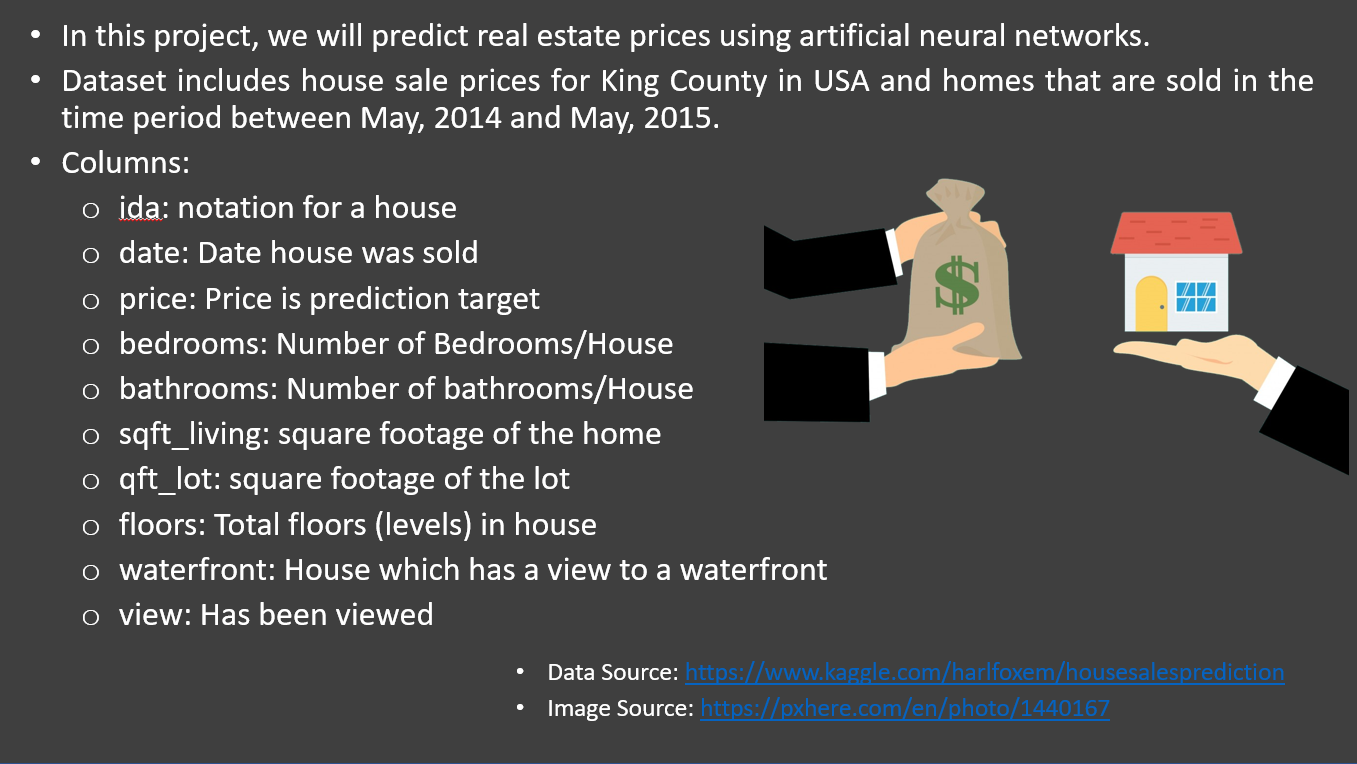

We are trying to predict the price which is predictive in nature and obtained from deep learning model. As price is a continuous variable, we will approach this problem using regression analysis.

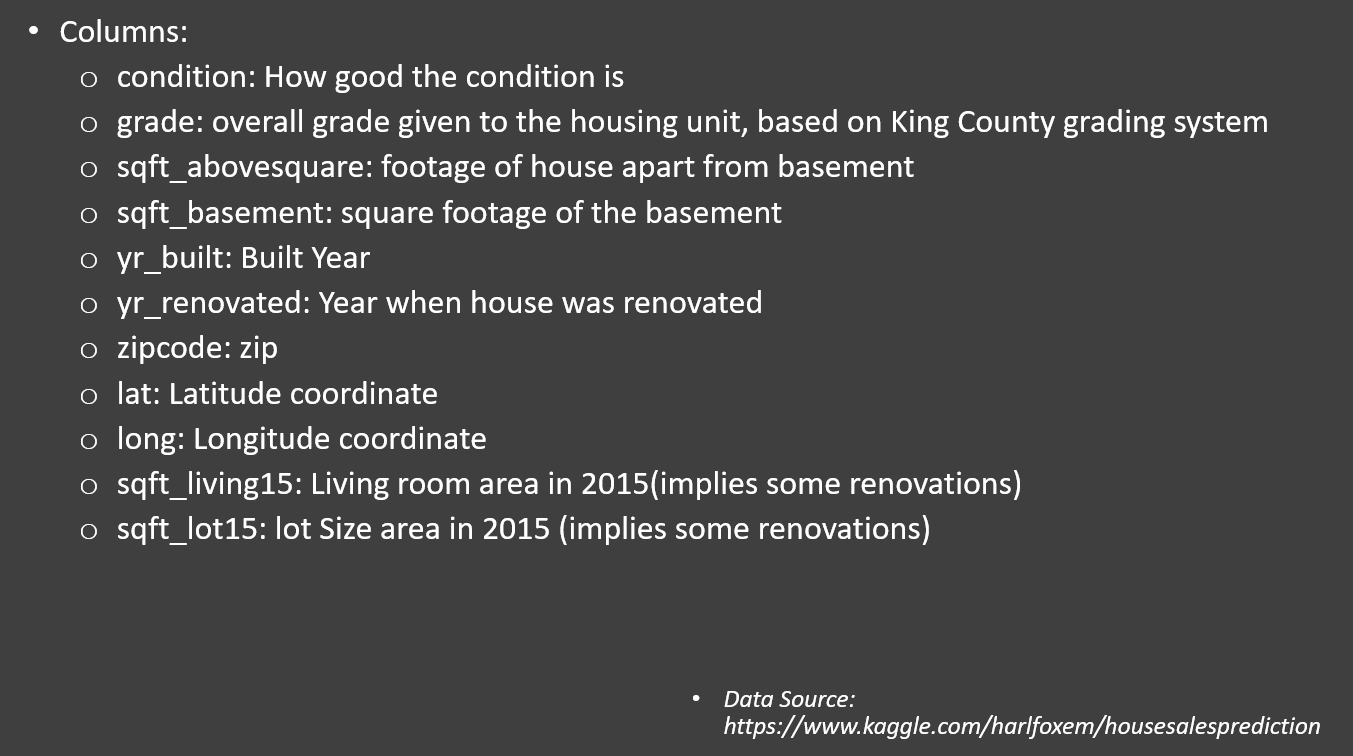

# Importing datasets and libraries

In [1]:
import pandas as pd # sort of like excel in python
import numpy as np # for numerical analysis at array manipulation
import seaborn as sns # used for data visualiztion
import matplotlib.pyplot as plt

In [3]:
property_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Implementing Deep Learning to predict property prices\Deep-Learning-for-Real-Estate-Price-Prediction-main\realestate_prices.csv", encoding = 'ISO-8859-1')

In [4]:
property_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The price column is the output that we'll be trying to predict.

In [5]:
property_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We get 21,613 non-null entries which relieves us from using fillna() command.

Property evaluations (number and frequency)

In [7]:
print('The average house price is:', property_df['price'].mean())
print('The price of the cheapest house is:', property_df['price'].min())
print('The average number of bathrooms is: ', round(property_df['bathrooms'].mean()))
print('The average number of bedrooms is: ', round(property_df['bedrooms'].mean()))
print('The maximum number of bedrooms is: ', property_df['bedrooms'].max())

The average house price is: 540088.1417665294
The price of the cheapest house is: 75000.0
The average number of bathrooms is:  2
The average number of bedrooms is:  3
The maximum number of bedrooms is:  33


In [9]:
# for a crisp statistical analysis, use the following code
property_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Operating Data Visualization

Plotting area of living vs price which we must get as a proportional relationship

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

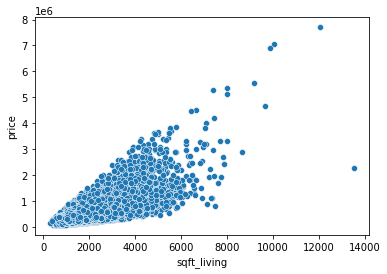

In [10]:
sns.scatterplot(x='sqft_living', y='price', data=property_df)

We see that the data is logically valid and is relatable. Now, we will plot histograms to see inter-parameter variations.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

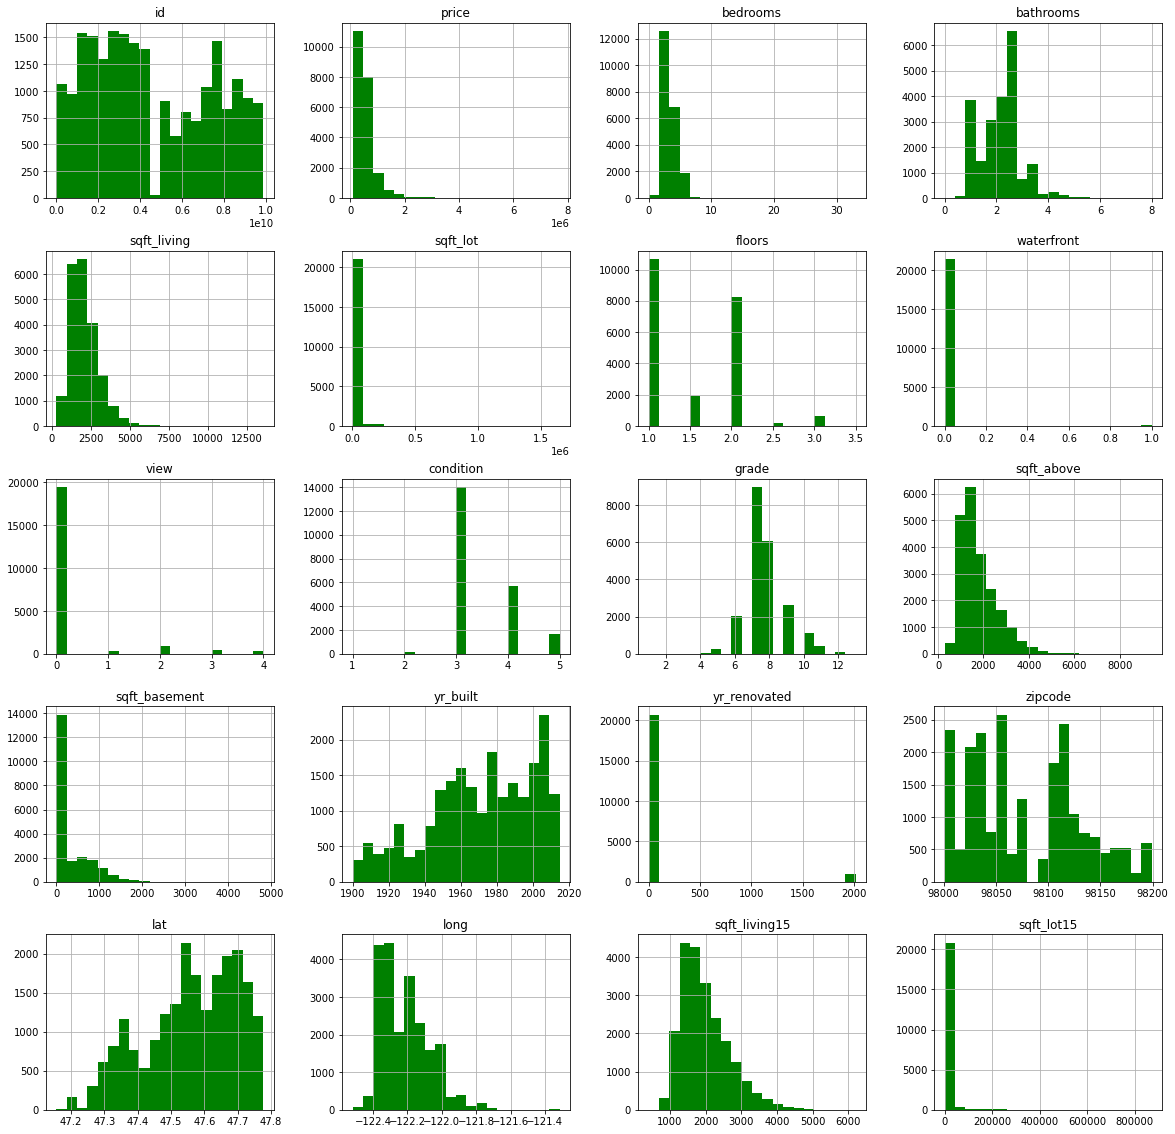

In [11]:
property_df.hist(bins=20, figsize=(20,20), color='g')

It might take some time for it to run.
Now what we got here is a histogram
of all the different features that we have in our data.

Next we wanted to plot the
correlation matrix to analyze and see if there exists
any correlation between our features.

<AxesSubplot:>

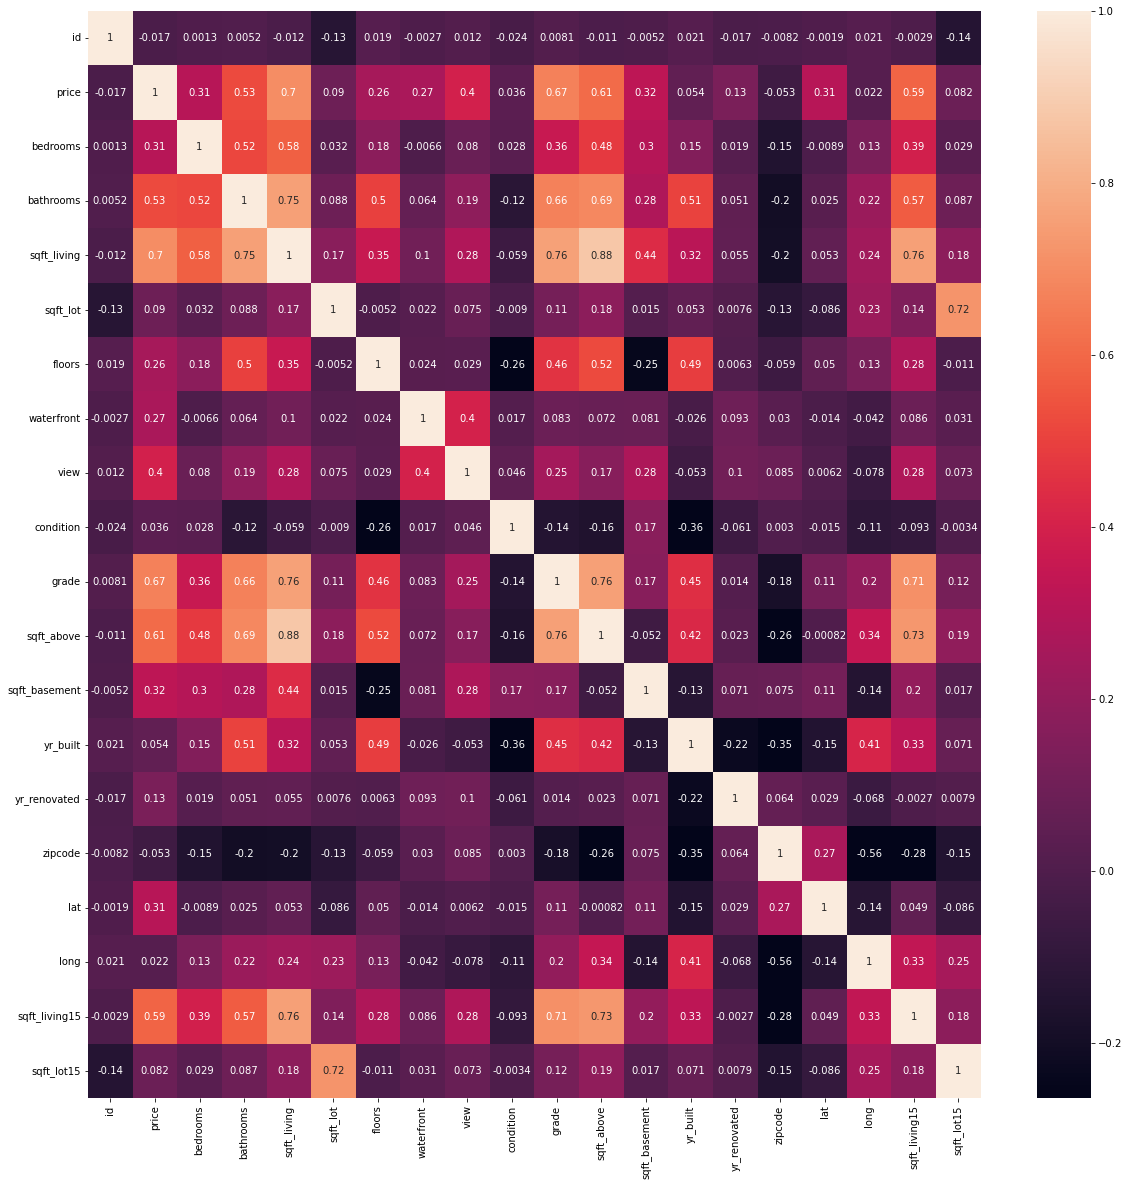

In [13]:
p, axis = plt.subplots(figsize=(20,20))
sns.heatmap(property_df.corr(), annot=True, robust=True)

We have positive correlation between the number of bathrooms,bedrooms and the price, which makes sense as the number of bathrooms tend to increase in the house, maybe the area tends to increase which affects the price of the house.



# Splitting dataset into dependent and independent dataset

In [16]:
x=property_df.drop(['price','date','id','zipcode','lat','long'],axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [17]:
y=property_df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

# Getting top 6 features contributing in house prediction using mutualinfo regression (Most important step)

In [22]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,np.array(y).flatten())
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
top_columns=mutual_info.sort_values(ascending=False).head(6).index #top 6 columns selection
top_columns

Index(['sqft_living', 'grade', 'sqft_living15', 'sqft_above', 'bathrooms',
       'bedrooms'],
      dtype='object')

In [23]:
X=x[top_columns]

In [24]:
X.head()

,sqft_living,grade,sqft_living15,sqft_above,bathrooms,bedrooms
0,1180,7,1340,1180,1.00,3
1,2570,7,1690,2170,2.25,3
2,770,6,2720,770,1.00,2
3,1960,7,1360,1050,3.00,4
4,1680,8,1800,1680,2.00,3


**Extra Task#2:**
- **Using Seaborn, plot the pairplot for the features contained in "property_df_sample"**
- **Explore the data and perform sanity check**

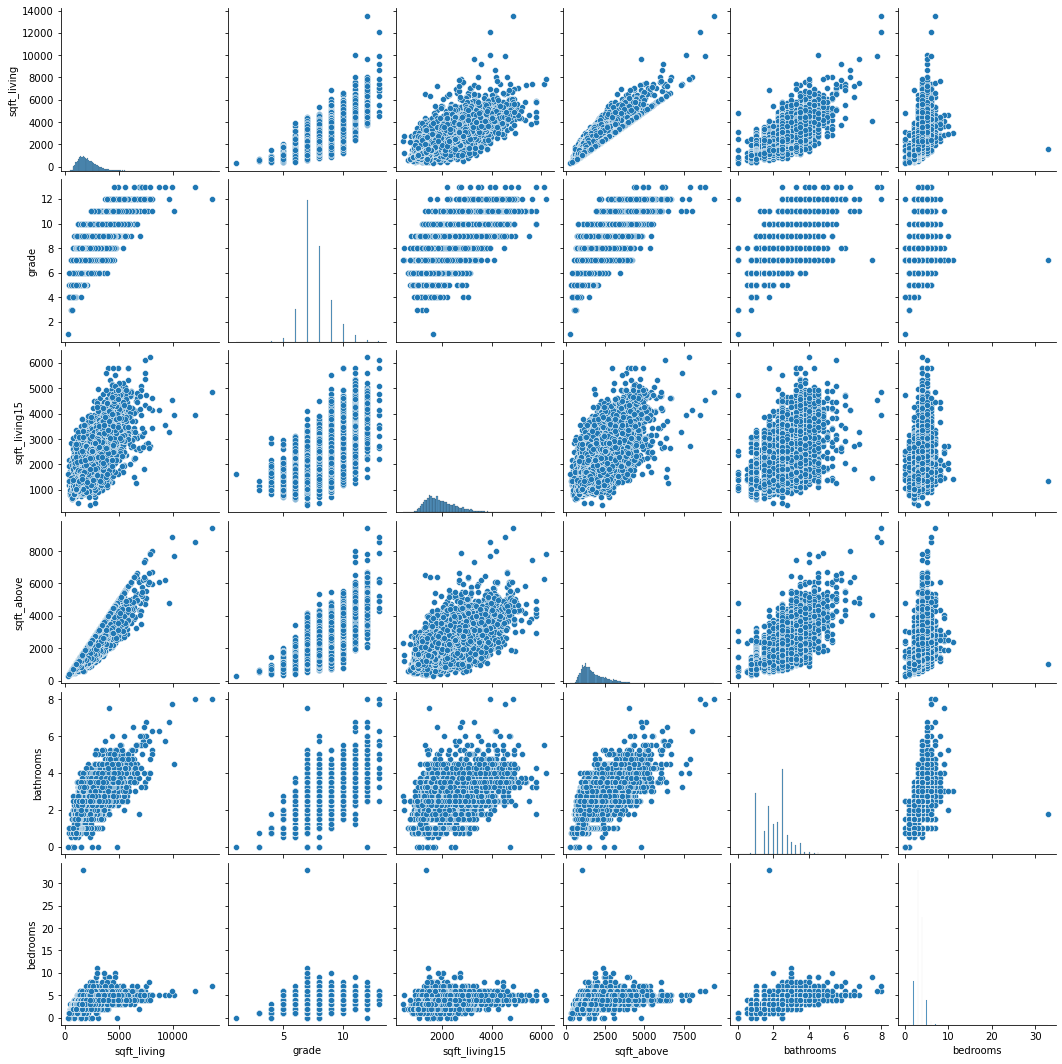

In [26]:
sns.pairplot(X)

# DATA PREPROCESSING AND FEATURE ENGINEERING

In [27]:
X.shape

(21613, 6)

Our X has 21613 rows and 7 columns.

In [28]:
y.shape

(21613,)

Our y has 21613 rows but only one column.

In [29]:
# Next, scale our data. 
# Load MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled

array([[0.06716981, 0.5       , 0.16193426, 0.09758772, 0.125     ,
        0.09090909],
       [0.17207547, 0.5       , 0.22216486, 0.20614035, 0.28125   ,
        0.09090909],
       [0.03622642, 0.41666667, 0.3994149 , 0.05263158, 0.125     ,
        0.06060606],
       ...,
       [0.05509434, 0.5       , 0.10686629, 0.08004386, 0.09375   ,
        0.06060606],
       [0.09886792, 0.58333333, 0.17398038, 0.14364035, 0.3125    ,
        0.09090909],
       [0.05509434, 0.5       , 0.10686629, 0.08004386, 0.09375   ,
        0.06060606]])

In [31]:
# If you check out the shape right now, nothing will change.
# We still have the same features
X_scaled.shape

(21613, 6)

In [32]:
# check out the max of the data
scaler.data_max_

array([1.354e+04, 1.300e+01, 6.210e+03, 9.410e+03, 8.000e+00, 3.300e+01])

In [33]:
# check out the min of the data
scaler.data_min_

array([290.,   1., 399., 290.,   0.,   0.])

In [34]:
# We're going to reshape the output.
y = y.values.reshape(-1,1)

In [35]:
# We're going to do the same as well for the scaler for the output two.
y_scaled = scaler.fit_transform(y)

In [36]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

So now we have scaled the input and scaled the output and now we're
ready for the next task where we're going to train
a deep learning model with limited number of features.

# Training the deep learning model

So what we wanted to do right now is first split our data into training and testing.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [38]:
# confirm X_train shape
X_train.shape

(16209, 6)

In [39]:
# confirm X_test shape
X_test.shape

(5404, 6)

Next, we're going to use tensorflow and use keras api.
Keras is a high level api that could be used to build really powerful deep
neural network models with very simple lines of code.

In [49]:
import tensorflow.keras
# import sequential
from tensorflow.keras.models import Sequential
# and then import dense.
from tensorflow.keras.layers import Dense

# Instantiate an object
model = Sequential()
model.add(Dense(100, input_dim = 6, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

In [50]:
# print out the summary of our model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,001
Trainable params: 21,001
Non-trainable params: 0
_________________________________________________________________


Here, it's showing us that we have 21,000 trainable parameters
in here. Think of it when we train any deep neural
network model, we have a bunch of inputs, we have a bunch
of outputs and we have all these different neurons
and we have weights or connections between these neurons.
And all what we're trying to do is that we're trying to optimize
and try to find the optimal values of these weights.

In [51]:
# compile the model
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [52]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 3s 7ms/step - loss: 0.0013 - val_loss: 9.2917e-04
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 8.9772e-04
Epoch 3/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/100
260/260 [==============================] - 1s 5ms/step - loss: 9.8999e-04 - val_loss: 9.5633e-04
Epoch 5/100
260/260 [==============================] - 1s 5ms/step - loss: 9.8821e-04 - val_loss: 9.0904e-04
Epoch 6/100
260/260 [==============================] - 1s 6ms/step - loss: 9.5244e-04 - val_loss: 0.0010
Epoch 7/100
260/260 [==============================] - 1s 5ms/step - loss: 9.6051e-04 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 1s 5ms/step - loss: 9.5152e-04 - val_loss: 9.6575e-04
Epoch 9/100
260/260 [==============================] - 1s 5ms/step - loss: 9.4848e-04 - val_loss: 9.4305e-04
Epoch 10/100
260/260 [=====================

260/260 [==============================] - 1s 3ms/step - loss: 8.4864e-04 - val_loss: 0.0011
Epoch 78/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5167e-04 - val_loss: 0.0013
Epoch 79/100
260/260 [==============================] - 1s 3ms/step - loss: 8.8103e-04 - val_loss: 0.0011
Epoch 80/100
260/260 [==============================] - 1s 3ms/step - loss: 8.7018e-04 - val_loss: 0.0011
Epoch 81/100
260/260 [==============================] - 1s 3ms/step - loss: 8.6536e-04 - val_loss: 0.0011
Epoch 82/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5042e-04 - val_loss: 0.0010
Epoch 83/100
260/260 [==============================] - 1s 3ms/step - loss: 8.4206e-04 - val_loss: 0.0011
Epoch 84/100
260/260 [==============================] - 1s 3ms/step - loss: 8.6629e-04 - val_loss: 0.0012
Epoch 85/100
260/260 [==============================] - 1s 3ms/step - loss: 8.6907e-04 - val_loss: 0.0011
Epoch 86/100
260/260 [==============================] - 1s 

# Evaluate trained Deep Learning Model Performance 

Now, let's evaluate the performance of our model.
If we recall our epochs_hist variable above, there we captured all the different performance of the model throughout the various epochs.

In [53]:
# let's check out the keys
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

We have two keys: 
- the loss and,
- the validation loss as well.

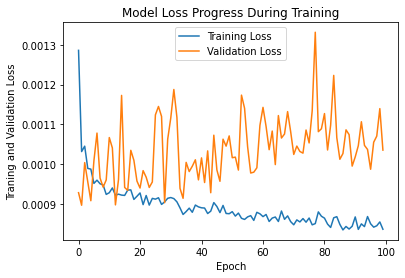

In [55]:
# let's plot the loss
plt.plot(epochs_hist.history['loss'])

# plot the validation loss
plt.plot(epochs_hist.history['val_loss'])

# add title, x-label, and y-label as well
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Traning and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 [==============================] - 1s 3ms/step


Text(0, 0.5, 'True Values')

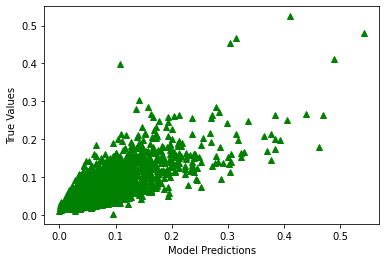

In [64]:
# first generate the y_predict value by passing along the X_test data
y_predict = model.predict(X_test)
# plot by passing along the y_test as x-axis vs. y_preidct as x-axis
plt.plot(y_test, y_predict, "^", color = 'g')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

What we get here is an okay line per se. But it looks like the data is scattered here all over the
place, meaning that the model needs refinement. Maybe we can improve that model a little bit further.

Another point to show here is the scale. 
So the model predictions and the true values are scaled
between zero and one which is what we needed to do when we
trained our model initially.
So if we wanted to plot the exact same plot but show the actual values, the raw values in dollars,
we'll need to do the inverse transform.

In [65]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

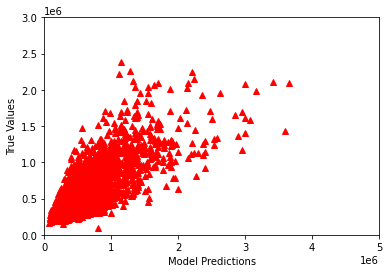

In [66]:
# let's plot it
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

Now we have the exact same data. But now we have the
units here in x_axis in dollars, which is a lot more readable compared to the previous one.

Finally, what I wanted to do is I wanted to generate all the
different metrics in here.

In [67]:
# first, obtain the length of our testing data
k = X_test.shape[1]
n = len(X_test)
n

5404

In [68]:
k

6

In [70]:
# Now let's plot the Root Mean Squared Error(RMSE), Mean Squared Error(MSE), Mean Absolute Error(MAE),
# r-squared(r2) which is the coefficient of detrmination, and the adjusted r-squared(more conservative of r2)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

# print all of these values here.

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =',r2, '\nAdjusted R2 =',adj_r2)

RMSE = 217010.844 
MSE = 47093706506.27982 
MAE = 142857.4122582809 
R2 = 0.6115287071091273 
Adjusted R2 = 0.6110968324088596
